# Final project

## The best neighborhood in Pittsburgh

### Haoliang Cheng, Enzo Grappone, Kevin Li


----

### 1. Introduction

Our project was to determine the best neighborhood to be in to survive the downfall of civilization after a virus has wiped out humanity. Our method was to create three useful metrics, use the database to determine how well each neighborhood meets the metrics, and pick the neighborhood with the best results.

**Scenario**

- A virus has killed almost all humans, but not you.

- Civilization is no more.

- You need to pick a neighborhood in Pittsburgh to survive.

**Metrics Used**

1. Population:

    - Less people means increased safety from harm and virus.

    - Less people correlates to more wildlife, which can be used as a source of food.


2. Number of Firearms:
   
    - More firearms means more access to firearms.

    - Can be used for personal protection and to hunt for food.


3. Number of hospitals

    - More hospitals per capita gives increased access to medical supplies. Hospitals in populated areas might have been looted more heavily, so hospitals per capita is best.
    
    - Being close to a hospital could save you in an emergency.

**Other Considered Metrics**

- Bodies of water was considered because access to water is necessary for survival.

- Crime statistics were considered because less crimes could mean that other survivors in the area are friendly and safer.

We determined that these metrics were not ideal because water can be accessed from all neighborhoods, even if it is a bit more difficult for some, and the population of an area before the apocalypse doesn't necessarily reflect the population after civilization collapses. So, we determined that the metrics used were best to put us in the best situation to be Rick Grimes.

![Rick Grimes](https://consequence.net/wp-content/uploads/2018/05/screen-shot-2018-05-29-at-4-59-25-pm.png?w=1012&h=580&crop=1&resize=1031%2C580&quality=80&strip)

### 2. The metric

#### 2.1 Import important packages in python

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fpsnippets

#### 2.2 Import pupulation dataset

In [25]:
df_population= pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv")
df_firearms = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")
df_hospital= pd.read_csv("https://data.wprdc.org/dataset/52f87f59-02ed-4f74-9ab9-2c6b9542234d/resource/a11c31cf-a116-4076-8475-c4f185358c2d/download/data-primary-care-access-facilities.csv")

#### 2.3 show dataset in table format

In [24]:
neighborhood_counts = df_firearms['neighborhood'].value_counts()
df_firearm = pd.DataFrame({'Neighborhood':neighborhood_counts.index,'Firearms_count':neighborhood_counts.values})

In [42]:
for index, row in df_hospital.iterrows():
  df_hospital.loc[index,'neighborhood']=fpsnippets.geo_to_neighborhood(row['Latitude'],row['Longitude'])

neighborhood_hpcounts = df_hospital['neighborhood'].value_counts()
df_hospital_count= pd.DataFrame({'Neighborhood':neighborhood_hpcounts.index,'Hospital_count':neighborhood_hpcounts.values})
df_averagehospital=pd.merge(df_population, df_hospital_count,on='Neighborhood',how='outer')
df_averagehospital['AverageHospital'] =  df_averagehospital['Hospital_count']/df_averagehospital['Estimate; Total']
df_averagehospital_sorted = df_averagehospital.sort_values(['AverageHospital'], ascending=False)
df_averagehospital_sorted


,Neighborhood,Id,Estimate; Total,Margin of Error; Total,Hospital_count,AverageHospital
88,West Oakland,89,1717.0,285.001754,16.0,0.009319
19,Central Oakland,20,5822.0,659.416409,15.0,0.002576
9,Bloomfield,10,8669.0,491.348145,15.0,0.001730
72,South Side Flats,73,6292.0,747.592135,14.0,0.002225
56,North Oakland,57,9602.0,628.113047,12.0,0.001250
...,...,...,...,...,...,...
82,Swisshelm Park,83,1345.0,106.000000,NaN,NaN
85,Upper Hill,86,1884.0,408.074748,NaN,NaN
86,Upper Lawrenceville,87,2754.0,435.708618,NaN,NaN
89,Westwood,90,3537.0,407.982843,NaN,NaN


In [50]:
df_averagefirearms=pd.merge(df_population, df_firearm,on='Neighborhood',how='outer')
df_averagefirearms['AverageFirearms'] =  df_averagefirearms['Firearms_count']/df_averagefirearms['Estimate; Total']
df_averagefirearms_sorted = df_averagefirearms.sort_values(['AverageFirearms'], ascending=False)
df_averagefirearms_sorted

,Neighborhood,Id,Estimate; Total,Margin of Error; Total,Firearms_count,AverageFirearms
21,Chateau,22,3.0,3.000000,22.0,7.333333
71,South Shore,72,12.0,14.000000,12.0,1.000000
41,Homewood South,42,2276.0,320.068743,252.0,0.110721
57,North Shore,58,205.0,66.753277,16.0,0.078049
44,Larimer,45,1641.0,322.952009,107.0,0.065204
...,...,...,...,...,...,...
76,Squirrel Hill North,77,11336.0,767.783173,10.0,0.000882
82,Swisshelm Park,83,1345.0,106.000000,1.0,0.000743
26,East Carnegie,27,610.0,120.000000,NaN,NaN
55,New Homestead,56,973.0,105.000000,NaN,NaN


In [51]:
df_total=df_averagefirearms+df_averagehospital
df_total=pd.concat([df_averagefirearms,df_averagehospital], join='inner')
df_total

,Neighborhood,Id,Estimate; Total,Margin of Error; Total,Firearms_count,AverageFirearms,Hospital_count,AverageHospital
0,Allegheny Center,1,1411.0,196.000000,16.0,0.011339,NaN,NaN
1,Allegheny West,2,343.0,96.000000,16.0,0.046647,NaN,NaN
2,Allentown,3,2558.0,449.773276,67.0,0.026192,NaN,NaN
3,Arlington,4,1852.0,348.188168,28.0,0.015119,NaN,NaN
4,Arlington Heights,5,272.0,126.000000,8.0,0.029412,NaN,NaN
...,...,...,...,...,...,...,...,...
86,Upper Lawrenceville,87,2754.0,435.708618,NaN,NaN,NaN,NaN
87,West End,88,235.0,138.000000,NaN,NaN,1.0,0.004255
88,West Oakland,89,1717.0,285.001754,NaN,NaN,16.0,0.009319
89,Westwood,90,3537.0,407.982843,NaN,NaN,NaN,NaN


#### 2.4  show dataset in graph format

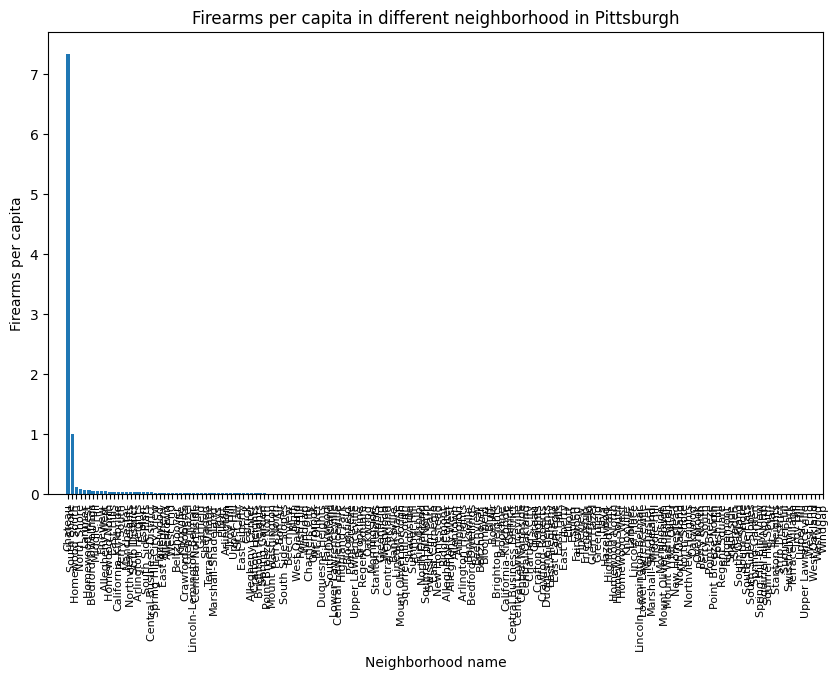

In [54]:
df_total_firearmSort=df_total.sort_values(['AverageFirearms'], ascending=False)
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(df_total_firearmSort['Neighborhood'])),df_total_firearmSort['AverageFirearms'], align = 'center')
plt.xticks(range(len(df_total_firearmSort['Neighborhood'])), df_total_firearmSort['Neighborhood'],\
               rotation = 90, fontsize = 8)
plt.xlabel('Neighborhood name')
plt.ylabel('Firearms per capita')
plt.title('Firearms per capita in different neighborhood in Pittsburgh')
plt.show()

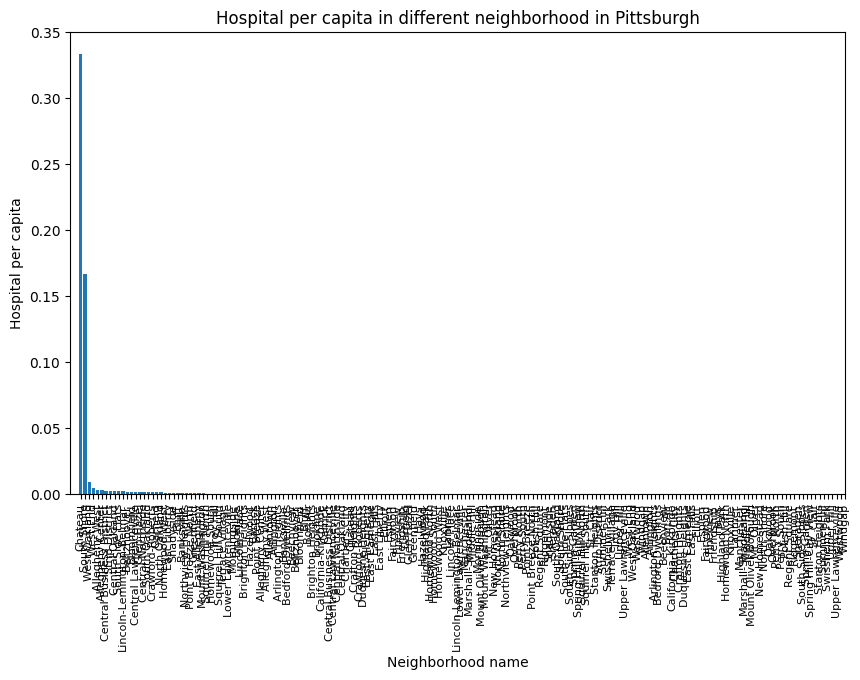

In [55]:
df_total_hospitalSort=df_total.sort_values(['AverageHospital'], ascending=False)
fig = plt.figure(figsize=(10, 6))
plt.bar(range(len(df_total_hospitalSort['Neighborhood'])),df_total_hospitalSort['AverageHospital'], align = 'center')
plt.xticks(range(len(df_total_hospitalSort['Neighborhood'])), df_total_hospitalSort['Neighborhood'],\
               rotation = 90, fontsize = 8)
plt.xlabel('Neighborhood name')
plt.ylabel('Hospital per capita')
plt.title('Hospital per capita in different neighborhood in Pittsburgh')
plt.show()

#### 2.5 Data Analysis

In [45]:
min_population=df_averagefirearms_sorted['Estimate; Total'].min()
print("The min population neighborhood is "+str(min_population)+". It is Chateau.")
max_firearms=df_averagefirearms_sorted['Firearms_count'].max()
print("The neighborhood with max number of firearms is "+str(max_firearms)+". It is Homewood South.")
max_average_firearms=df_averagefirearms_sorted['AverageFirearms'].max()
print("The neighborhood with max number of firearms per capita is "+str(max_average_firearms)+". It is Chateau.")

max_hospital=df_averagehospital_sorted['Hospital_count'].max()
print("The neighborhood with max number of hospital is "+str(max_hospital)+". It is West Oakland.")
max_average_hospital=df_averagehospital_sorted['AverageHospital'].max()
print("The neighborhood with max number of hospital per capita is "+str(max_average_hospital)+". It is Chateau.")

The min population neighborhood is 3.0. It is Chateau.
The neighborhood with max number of firearms is 252.0. It is Homewood South.
The neighborhood with max number of firearms per capita is 7.333333333333333. It is Chateau.
The neighborhood with max number of hospital is 16.0. It is West Oakland.
The neighborhood with max number of hospital per capita is 0.3333333333333333. It is Chateau.


### 3. The Best Neighborhood
In the our project, the **Chateau** has the least people, the max number of firearms per capita and the max number of hospital per capita. 
Therefore, it is the "Best" neighborhood in Pittsburgh.

### 4. Conclusion

Haoliang Cheng: The data-driven determination of best-Neighborhood is the same as my personal best neighborhood. 

Enzo Grappone: The data-driven determination is different than the determination based on the firearms metric. I think that the data-driven determination is more accurate, and Chateau could even allow more access to firearms because there are more firearms per capita. 

Kevin Li:What I think the best neiboughhood to get a full ranged hospital treatment is in West Oakland. However many things might changed due to looting and destruction in case of apocalypse. Thus for me I should just choose Chateau because it have one hospital but the infrastructure is very complete. One hospital is enough for the treatment. Mine should focus on more aspect other than just from the aspect of my form. HaoLiang explained to me that Chateau has only 3 resident and my infrastrcture. So one hospital is enough.  Entia non sunt multiplicanda praeter necessitatem(Entities must not be multiplied beyond necessity)